In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [96]:
x = [1,2,3,4,5]
y = [2,3,5,7,11]

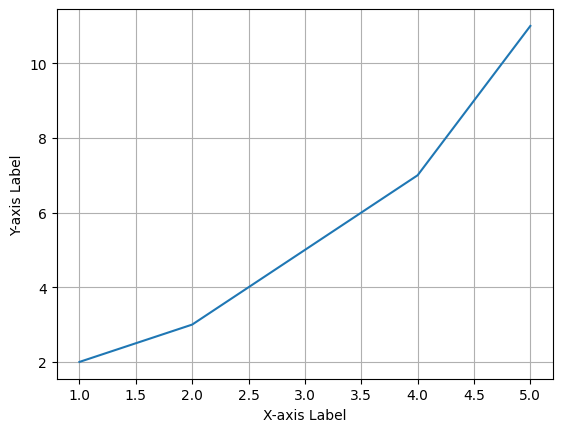

In [97]:
plt.plot(x, y)
plt.grid(True)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

In [98]:
salary = {
    70000, 80000, 120000, 90000, 110000, 95000, 105000, 115000, 130000, 125000
}
df = pd.DataFrame(salary, columns=['salary'])
df.head(5)

,salary
0,80000
1,120000
2,105000
3,125000
4,70000


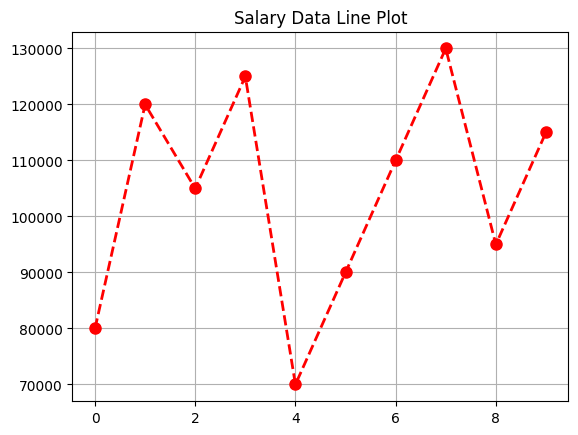

In [99]:
# line plot of salary data
plt.plot(df['salary'], marker='o', color='r', linestyle='--', linewidth=2, markersize=8)
plt.grid(True)
plt.title('Salary Data Line Plot')
plt.show()

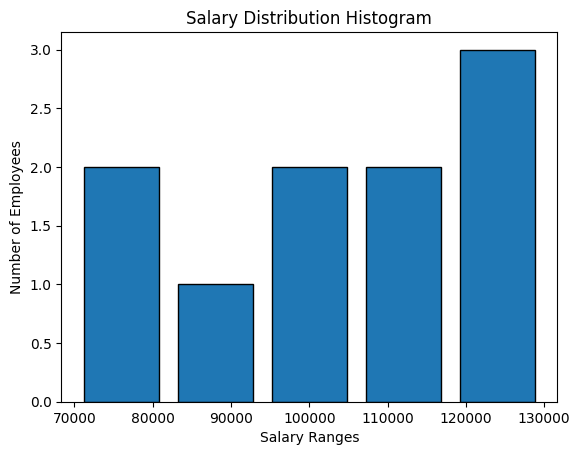

In [100]:
# ploting histogram and add space between bars
plt.hist(df['salary'], bins=5, edgecolor='black', rwidth=0.8)
plt.title('Salary Distribution Histogram')
plt.xlabel('Salary Ranges')
plt.ylabel('Number of Employees')
plt.show()

C:\Users\aanan\AppData\Local\Temp\ipykernel_6504\3859566757.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


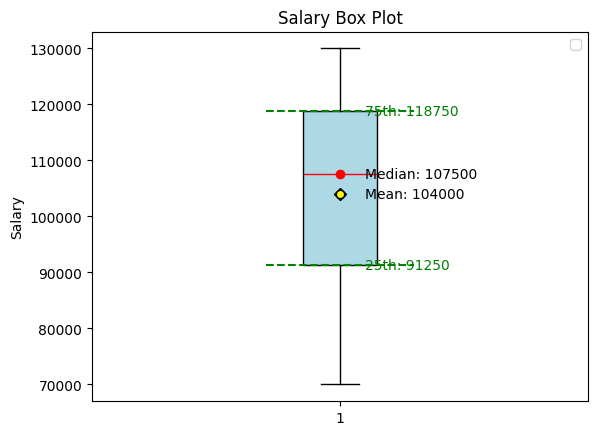

In [101]:
# show boxplot and annotate mean, median, Q1, Q3 and outliers
mean_val = df['salary'].mean()
median_val = df['salary'].median()
q1 = df['salary'].quantile(0.25)
q3 = df['salary'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df['salary'][(df['salary'] < lower) | (df['salary'] > upper)]

bp = plt.boxplot(df['salary'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'),
            showmeans=True,
            meanprops=dict(marker='D', markeredgecolor='black', markerfacecolor='yellow'))
plt.title('Salary Box Plot')
plt.ylabel('Salary')

# draw dashed horizontal lines for Q1 and Q3
plt.hlines([q1, q3], xmin=0.85, xmax=1.15, colors='green', linestyles='dashed')

# annotate percentiles
plt.text(1.05, q1, f'25th: {q1:.0f}', va='center', color='green')
plt.text(1.05, q3, f'75th: {q3:.0f}', va='center', color='green')

# annotate mean and median (place text slightly to the right of the box)
plt.scatter([1], [mean_val], color='yellow', edgecolor='black', zorder=3)
plt.text(1.05, mean_val, f'Mean: {mean_val:.0f}', va='center')
plt.scatter([1], [median_val], color='red', zorder=3)
plt.text(1.05, median_val, f'Median: {median_val:.0f}', va='center')

# plot outliers (jitter x positions for visibility) and label them
if not outliers.empty:
    x_jitter = np.random.uniform(0.9, 1.1, size=outliers.shape[0])
    plt.scatter(x_jitter, outliers.values, marker='x', color='black', label='outliers')
    for xi, yi in zip(x_jitter, outliers.values):
        plt.text(xi + 0.02, yi, f'{yi:.0f}', va='center', fontsize=8)

# show legend and plot
plt.legend(loc='upper right')
plt.show()

In [102]:
df['department'] = ['HR', 'Finance', 'IT', 'Marketing', 'Sales', 'IT', 'Finance', 'HR', 'Sales', 'Marketing']
df

,salary,department
0,80000,HR
1,120000,Finance
2,105000,IT
3,125000,Marketing
4,70000,Sales
5,90000,IT
6,110000,Finance
7,130000,HR
8,95000,Sales
9,115000,Marketing


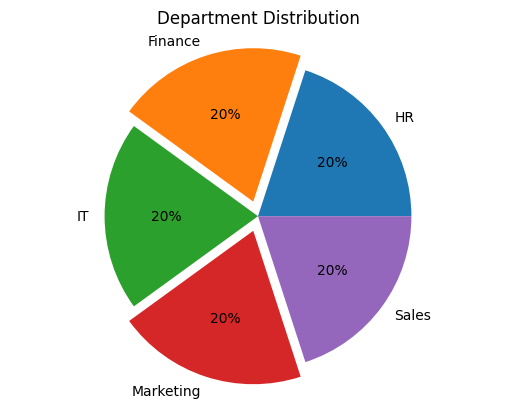

In [103]:
# pi chart
dept_counts = df['department'].value_counts()
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.0f%%',
        explode=[0, 0.1, 0, 0.1, 0]      # add 0.1 for each department if need to explode and put for all index like here it is upto 0 to 4 index
        # explode=[0.1 if label == 'HR' else 0 for label in dept_counts.index  ]    # explode for hr department
        )
plt.axis('equal')
plt.title('Department Distribution')
plt.show()

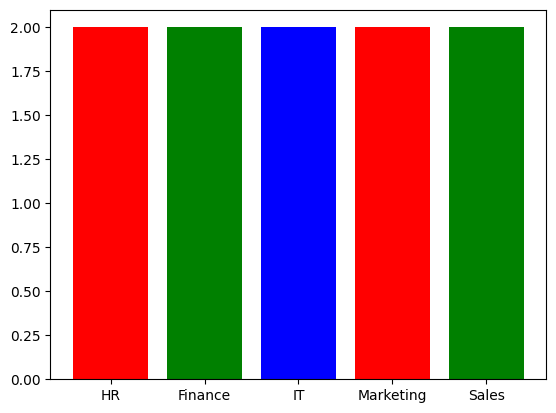

In [104]:
 # count plot
plt.bar(dept_counts.index, dept_counts, color=['r', 'g', 'b', 'r', 'g'])
plt.show()

In [105]:
df['age'] = [25, 30, 35, 28, 32, 40, 29, 31, 38, 27]

In [106]:
df

,salary,department,age
0,80000,HR,25
1,120000,Finance,30
2,105000,IT,35
3,125000,Marketing,28
4,70000,Sales,32
5,90000,IT,40
6,110000,Finance,29
7,130000,HR,31
8,95000,Sales,38
9,115000,Marketing,27


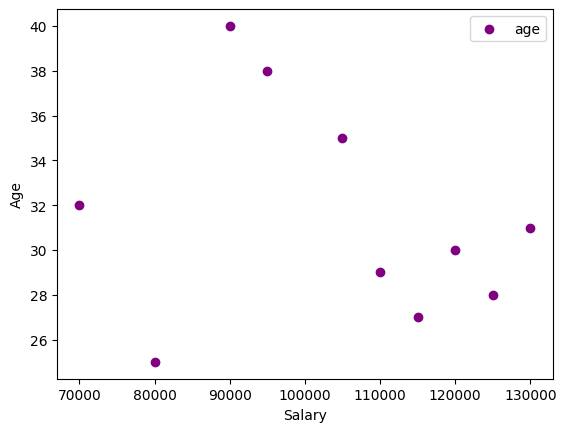

In [107]:
# scatter plot
plt.scatter('salary', 'age', data=df, color='purple')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.legend()
plt.show()

In [108]:
sorted_age = df.sort_values(by='age')

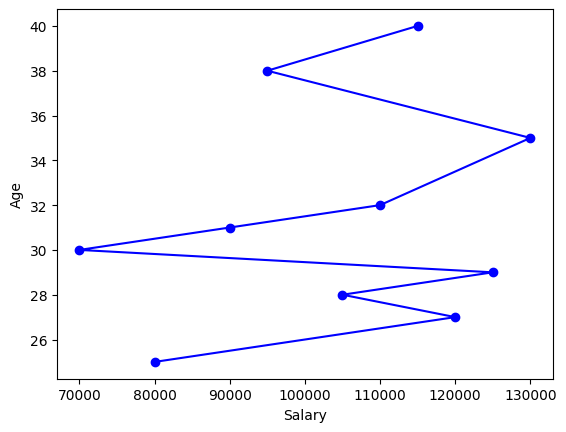

In [109]:
# line plot of age vs salary
plt.plot(df['salary'], sorted_age['age'], marker='o', color='blue' )
plt.xlabel('Salary')
plt.ylabel('Age')
plt.show()

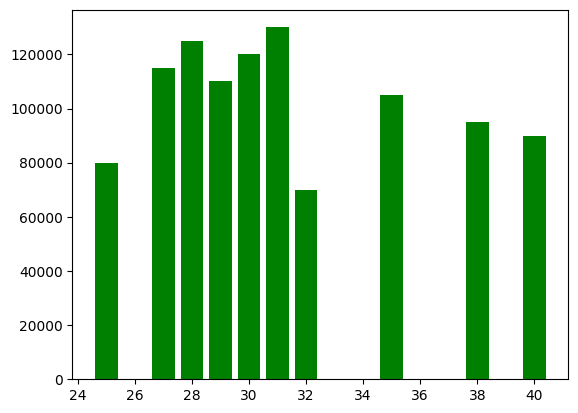

In [110]:
# bar chart
plt.bar(df['age'], df['salary'], color='g')
plt.show()

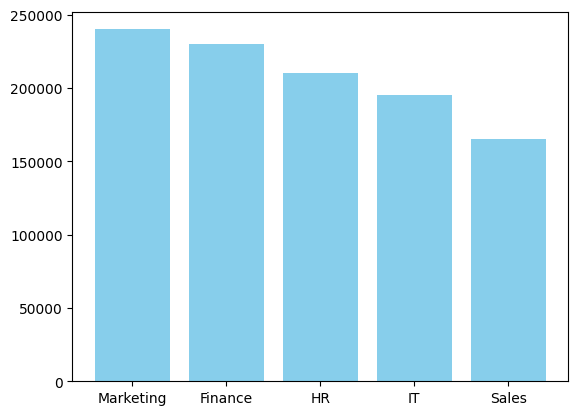

In [ ]:
# bar chart of department vs salary
dept_salary = df.groupby('department')['salary'].sum().sort_values(ascending=False)     # finding the sum of salary in each department
plt.bar(dept_salary.index, dept_salary.values, color='skyblue')
plt.show()